<a href="https://colab.research.google.com/github/Subhamtr01/DL_NLP/blob/main/Mobile_weight_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
from  pathlib import Path

In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [55]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [56]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [57]:
pathToFolder = "/gdrive/MyDrive/DLP"

In [58]:
path = Path(pathToFolder) / "mobile_price.csv"

In [59]:
mobile_price = pd.read_csv(path)
mobile_price.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [60]:
y = mobile_price.pop("mobile_wt")
X = mobile_price

In [61]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,5,5,336,670,869,18,10,19,1,1,1,0


In [62]:
model = tf.keras.Sequential()

In [63]:
model.add(layers.Input( shape = (20,) ) )

In [64]:
model.add(layers.Dense(900, activation='sigmoid'))

In [65]:
model.add(layers.Dense(700, activation='relu'))

In [66]:
model.add(layers.Dense(1))

In [67]:
model.compile( loss = "mae")

In [68]:
model.fit(X,y, epochs = 500 )

Epoch 1/500
63/63 [==============================] - 2s 15ms/step - loss: 36.4244
Epoch 2/500
63/63 [==============================] - 1s 15ms/step - loss: 31.3443
Epoch 3/500
63/63 [==============================] - 1s 15ms/step - loss: 31.4479
Epoch 4/500
63/63 [==============================] - 1s 15ms/step - loss: 31.2456
Epoch 5/500
63/63 [==============================] - 1s 15ms/step - loss: 31.4283
Epoch 6/500
63/63 [==============================] - 1s 22ms/step - loss: 31.1941
Epoch 7/500
63/63 [==============================] - 1s 22ms/step - loss: 31.3358
Epoch 8/500
63/63 [==============================] - 1s 22ms/step - loss: 31.2331
Epoch 9/500
63/63 [==============================] - 1s 19ms/step - loss: 31.2217
Epoch 10/500
63/63 [==============================] - 1s 14ms/step - loss: 31.1165
Epoch 11/500
63/63 [==============================] - 1s 14ms/step - loss: 31.0894
Epoch 12/500
63/63 [==============================] - 1s 14ms/step - loss: 31.0362
Epoch 13/500


In [69]:
pred = model.predict(X)

63/63 [==============================] - 0s 4ms/step


In [70]:
pred = np.round(pred)


In [71]:
y.shape

(2000,)

In [72]:
np.sum(pred == y.values.reshape(2000,1))/2000

0.0065

In [73]:
from tensorflow.keras.utils import plot_model

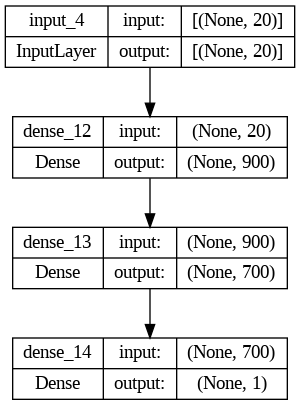

In [74]:
plot_model(model, show_shapes=True)

In [75]:
######### --------Done ---------------